In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("white")

df = pd.read_csv("acs2015.csv")

#create a %Male column
df['MaleP'] = df['Men']/df['TotalPop']
df.sample(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,MaleP
2614,48183,Texas,Gregg,123178,60328,62850,17.7,59.3,19.9,0.4,...,1.4,2.1,20.1,55402,84.7,9.8,5.4,0.1,5.9,0.489763
1576,29186,Missouri,Ste. Genevieve,17990,9072,8918,1.0,95.6,0.7,0.1,...,0.2,3.7,25.3,8313,83.9,10.5,5.2,0.4,5.4,0.504280
2720,48395,Texas,Robertson,16532,8262,8270,19.3,58.4,20.7,0.1,...,0.5,2.5,25.7,6776,69.8,22.4,7.6,0.1,9.2,0.499758
2166,40071,Oklahoma,Kay,45587,22556,23031,7.2,76.0,1.9,7.1,...,1.6,1.8,17.1,19588,78.1,15.8,5.9,0.2,7.8,0.494790
2941,51735,Virginia,Poquoson city,12077,5912,6165,2.3,92.6,1.0,0.1,...,1.5,4.6,23.6,5932,73.6,20.4,5.5,0.5,4.5,0.489526


Exploring the data: Univariate


In [44]:
# How many data points and variables
print("Datapoints:",len(df))
print("Variables:", len(df.columns))
print("I have 38 variables, although I wont use all of them. I have 2 Categorical variables initially, but I can create more by creating categories such as Racially diverse/homogenous or Low/Middle/High income.")



Datapoints: 3220
Variables: 38
I have 38 variables, although I wont use all of them. I have 2 Categorical variables initially, but I can create more by creating categories such as Racially diverse/homogenous or Low/Middle/High income.


In [45]:
#Keep only the columns I want to work on
df = df[['State', 'MaleP', 'White', 'PrivateWork', 'IncomePerCap', 'Poverty', 'Drive','Professional','MeanCommute', 'Unemployment']] 
df.head(5)

,State,MaleP,White,PrivateWork,IncomePerCap,Poverty,Drive,Professional,MeanCommute,Unemployment
0,Alabama,0.484327,75.8,73.6,24974,12.9,87.5,33.2,26.5,7.6
1,Alabama,0.488487,83.1,81.5,27317,13.4,84.7,33.1,26.4,7.5
2,Alabama,0.538282,46.2,71.8,16824,26.7,83.8,26.8,24.1,17.6
3,Alabama,0.534109,74.5,76.8,18431,16.8,83.2,21.5,28.8,8.3
4,Alabama,0.494056,87.9,82.0,20532,16.7,84.9,28.5,34.9,7.7


In [46]:
#Missing data
missing_value = df.isnull().sum()
print("Missing Data:", missing_value[:])

Missing Data: State           0
MaleP           0
White           0
PrivateWork     0
IncomePerCap    0
Poverty         0
Drive           0
Professional    0
MeanCommute     0
Unemployment    0
dtype: int64


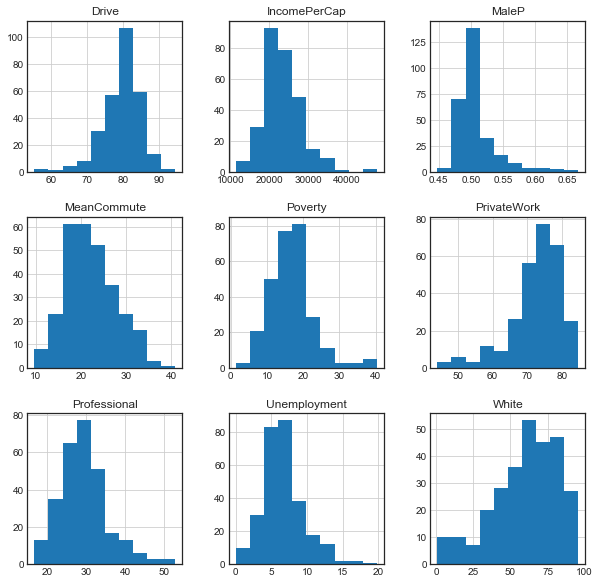

NormaltestResult(statistic=64.432984451410135, pvalue=1.0198943833621546e-14)
NormaltestResult(statistic=56.785767269263502, pvalue=4.6679620020116243e-13)
NormaltestResult(statistic=10.050317402317821, pvalue=0.0065705436592887901)
NormaltestResult(statistic=46.050486774904783, pvalue=1.0006077270793813e-10)
NormaltestResult(statistic=40.955741628232886, pvalue=1.2781261024867398e-09)
NormaltestResult(statistic=44.786318423964175, pvalue=1.8826713854552192e-10)
None of my variables seem to be normally distributed, and don't appear to fit any common distributions


In [47]:
import scipy
%matplotlib inline
#Subset data to make plots more clear
df_UT = df.loc[(df['State'] == 'Utah') | (df['State'] =='Texas')]
df_UT.hist(figsize = (10,10))
plt.show()

print(stats.normaltest(df_UT['Drive']))
print(stats.normaltest(df_UT['IncomePerCap']))
print(stats.normaltest(df_UT['MeanCommute']))
print(stats.normaltest(df_UT['Poverty']))
print(stats.normaltest(df_UT['Professional']))
print(stats.normaltest(df_UT['Unemployment']))


print("None of my variables seem to be normally distributed, and don't appear to fit any common distributions")


In [48]:
print(df_UT.describe())

for col in df_UT.loc[:,'MaleP':'Unemployment'].columns:
    print(col)
    print(np.var(df_UT[col]))
    


            MaleP       White  PrivateWork  IncomePerCap     Poverty  \
count  283.000000  283.000000   283.000000    283.000000  283.000000   
mean     0.508296   60.270671    72.488339  23449.371025   16.760424   
std      0.031441   21.833690     7.573814   5049.903405    6.122496   
min      0.448059    0.900000    44.100000  11413.000000    1.400000   
25%      0.491593   46.350000    69.250000  20255.500000   12.950000   
50%      0.499471   63.600000    73.900000  22643.000000   16.500000   
75%      0.513580   77.150000    77.400000  26159.500000   19.850000   
max      0.667156   95.700000    84.700000  47733.000000   40.300000   

            Drive  Professional  MeanCommute  Unemployment  
count  283.000000    283.000000   283.000000    283.000000  
mean    79.620141     29.425442    22.159011      6.658304  
std      5.219384      6.179730     5.557081      2.911586  
min     55.400000     16.700000     9.700000      0.000000  
25%     76.950000     25.200000    17.900000  

Exploring the data: Bivariate

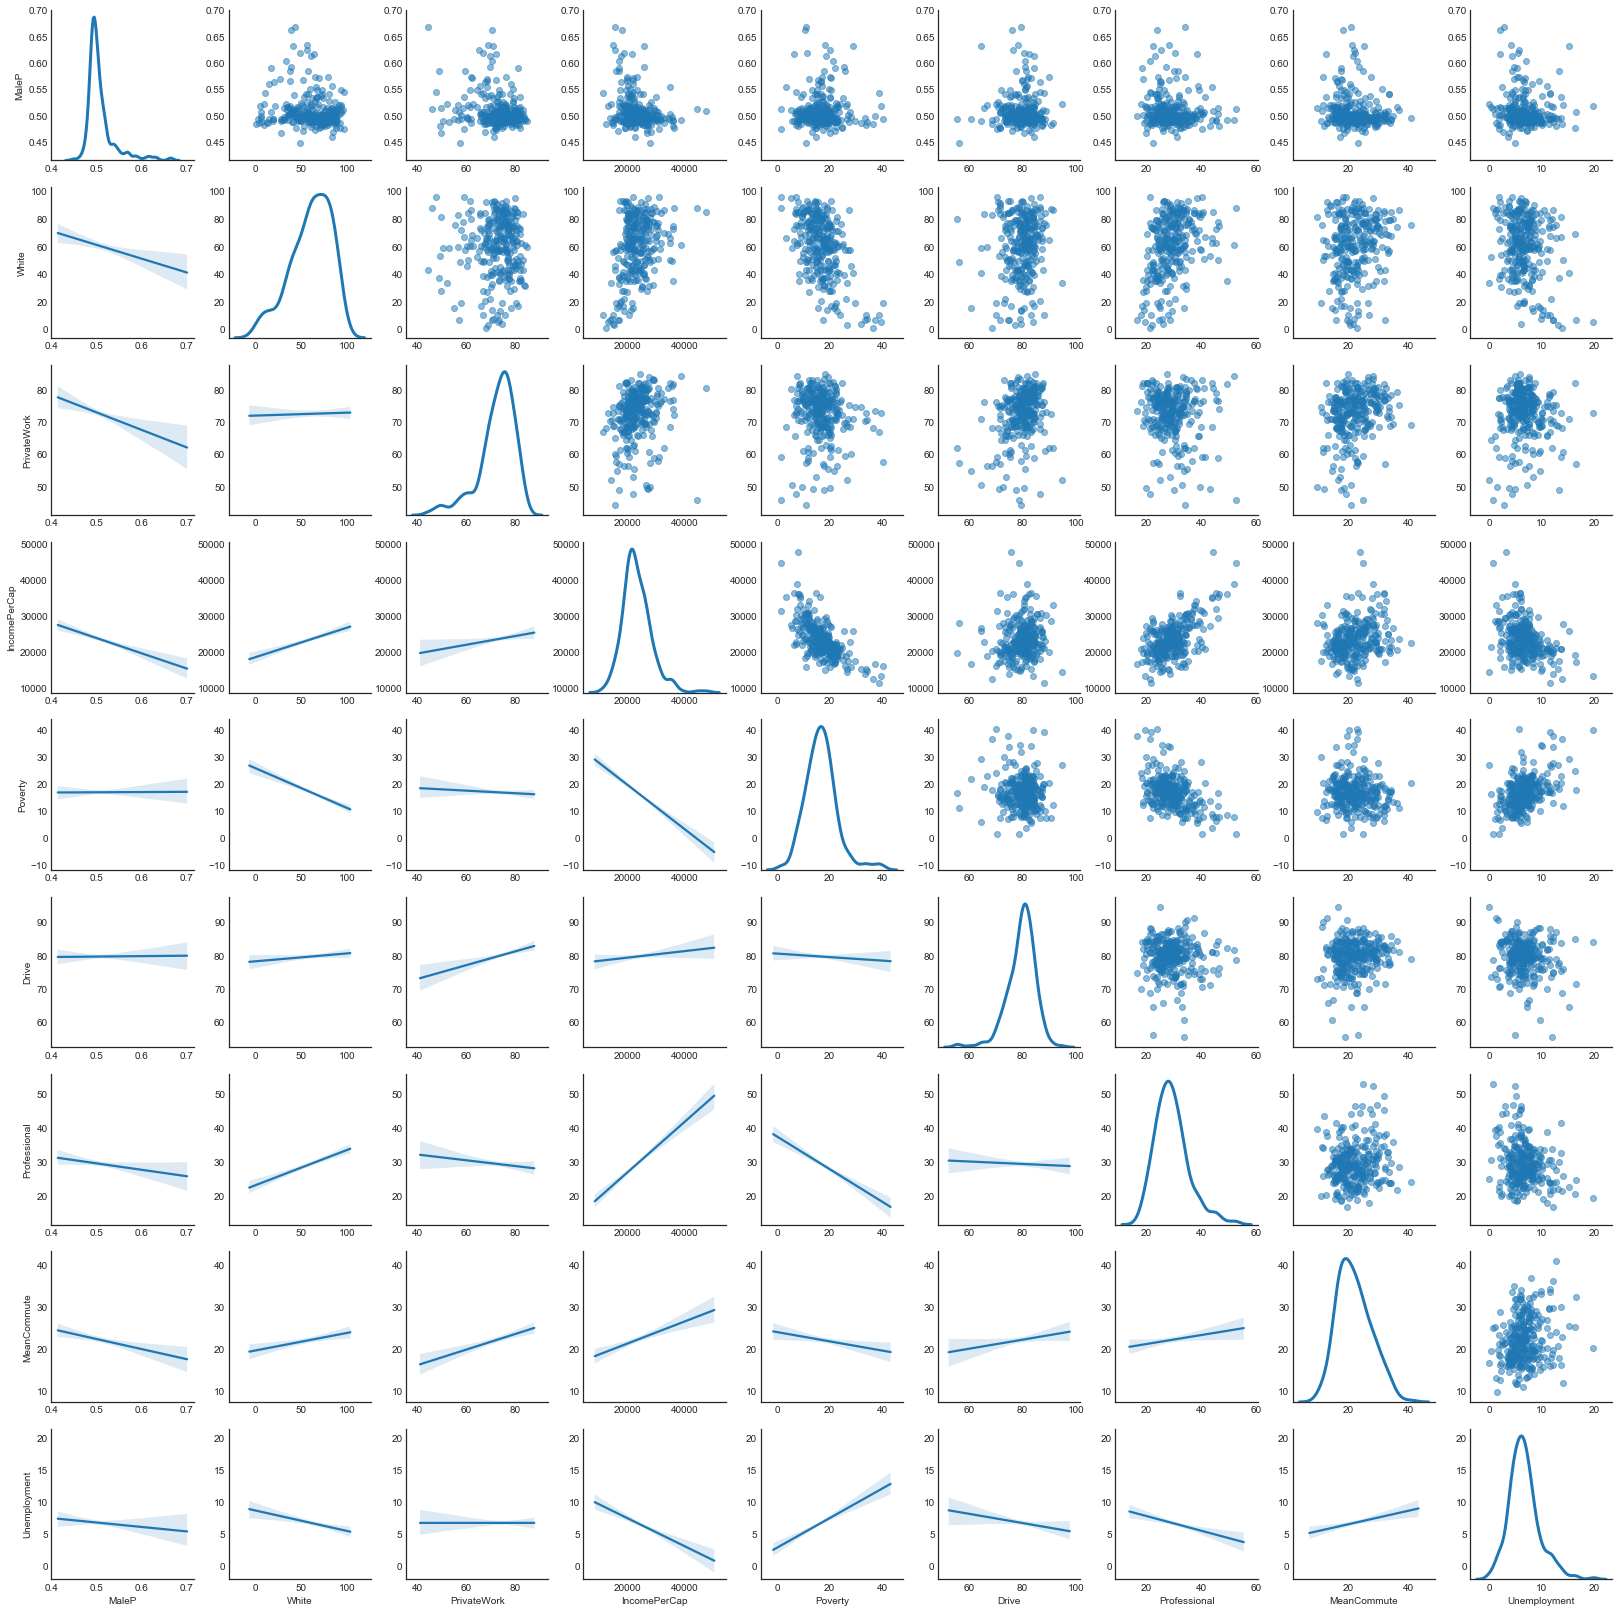

In [49]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_UT.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()



                 MaleP     White  PrivateWork  IncomePerCap   Poverty  \
MaleP         1.000000 -0.143591    -0.225081     -0.262746  0.004407   
White        -0.143591  1.000000     0.026433      0.358123 -0.529873   
PrivateWork  -0.225081  0.026433     1.000000      0.180985 -0.059072   
IncomePerCap -0.262746  0.358123     0.180985      1.000000 -0.674063   
Poverty       0.004407 -0.529873    -0.059072     -0.674063  1.000000   
Drive         0.007876  0.099776     0.298869      0.094518 -0.061416   
Professional -0.095445  0.367829    -0.102875      0.601830 -0.469640   
MeanCommute  -0.135609  0.165932     0.252369      0.238663 -0.120933   
Unemployment -0.074728 -0.241747     0.000248     -0.378018  0.482312   

                 Drive  Professional  MeanCommute  Unemployment  
MaleP         0.007876     -0.095445    -0.135609     -0.074728  
White         0.099776      0.367829     0.165932     -0.241747  
PrivateWork   0.298869     -0.102875     0.252369      0.000248  
Incom

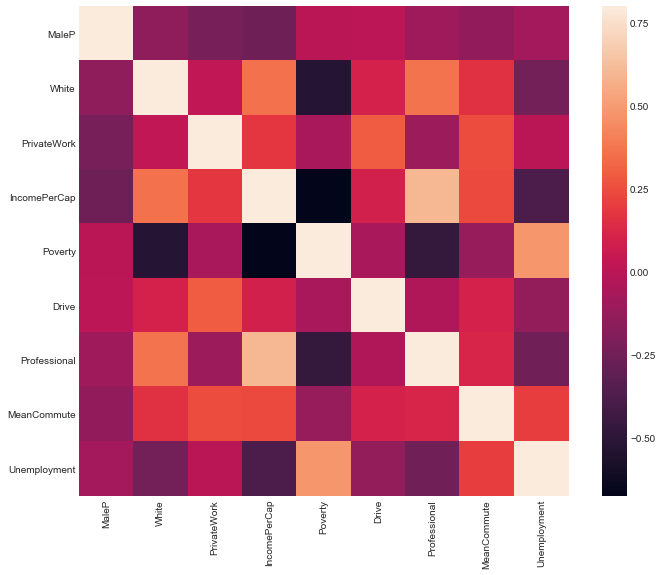

In [50]:
# Make the correlation matrix.
corrmat = df_UT.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

/Users/j/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


       Drive                                                    IncomePerCap  \
       count       mean       std   min   25%   50%   75%   max        count   
State                                                                          
Texas  254.0  79.941339  5.188142  55.4  77.6  80.7  83.1  94.6        254.0   
Utah    29.0  76.806897  4.692542  65.7  74.4  75.9  80.3  86.5         29.0   

                     ...  Unemployment        White                        \
               mean  ...           75%   max  count       mean        std   
State                ...                                                    
Texas  23551.799213  ...           8.1  19.8  254.0  57.376772  20.969953   
Utah   22552.241379  ...           7.1  10.5   29.0  85.617241   9.296892   

                                        
        min     25%   50%    75%   max  
State                                   
Texas   0.9  43.125  60.4  73.75  95.5  
Utah   45.8  83.700  85.8  92.00  95.7  

[2 rows

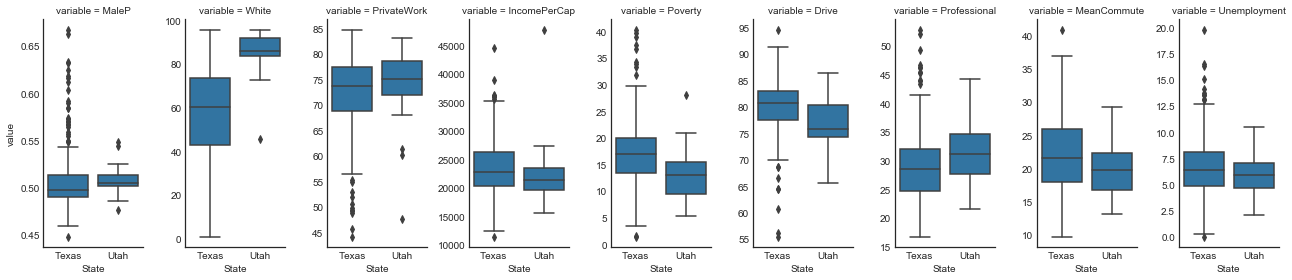

In [51]:
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_UT
df_long = pd.melt(df_long, id_vars=['State'])


g = sns.FacetGrid(df_long, col="variable", sharey=False,size=4, aspect=.5)
g = g.map(sns.boxplot, 'State', 'value')
#plt.show()

# Descriptive statistics by group.
print(df_UT.groupby('State').describe())

# Test whether group differences are significant.
for col in df_UT.loc[:,'MaleP':'Unemployment'].columns:
    print(col)
    print(stats.ttest_ind(
        df_UT[df_UT['State'] == 'Utah'][col].dropna(),
        df_UT[df_UT['State'] == 'Texas'][col].dropna()
    ))

## Feature Engineering

In [66]:
print(df.head())
print(df.State.unique())

     State     MaleP  White  PrivateWork  IncomePerCap  Poverty  Drive  \
0  Alabama  0.484327   75.8         73.6         24974     12.9   87.5   
1  Alabama  0.488487   83.1         81.5         27317     13.4   84.7   
2  Alabama  0.538282   46.2         71.8         16824     26.7   83.8   
3  Alabama  0.534109   74.5         76.8         18431     16.8   83.2   
4  Alabama  0.494056   87.9         82.0         20532     16.7   84.9   

   Professional  MeanCommute  Unemployment  
0          33.2         26.5           7.6  
1          33.1         26.4           7.5  
2          26.8         24.1          17.6  
3          21.5         28.8           8.3  
4          28.5         34.9           7.7  
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi'

In [67]:
#Categorical variables

# Create a data frame to hold our features.
features = pd.get_dummies(df['State'])

#Feature One: Midwest counties to determine how unemployment correlates from the Midwest vs the rest of the country.
features['MidWest'] = np.where((df['State'].isin(['Illinois', 'Indiana', 'Iowa', 'Michigan','Wisconsin', 'Missouri','Ohio',''])), 1, 0)

#Feature 2:Do states with high venture funding have lower unemployment.
features['Venture'] = np.where((df['State'].isin(['California','Illinois', 'New York', 'Massachusetts', 'Virginia','Florida', 'Georgia','Maryland'])), 1, 0)



In [68]:
#Changing Variable Types

#Feature 3: Explore the relationship between Diversity in counties and unemployment.
features['Diverse'] = np.where(df['White']<=50, 1, 0)
print(df['White'].groupby(features['Diverse']).describe())

#Feature 4: Explore the relationship between Gender in counties and unemployment.
features['MostlyMen'] = np.where(df['MaleP']> .5,1,0)
print(df['MaleP'].groupby(features['MostlyMen']).describe())


          count       mean        std   min   25%   50%   75%   max
Diverse                                                            
0        2779.0  82.758402  13.107764  50.1  73.5  87.2  94.0  99.8
1         441.0  29.240590  16.890445   0.0  15.6  35.2  43.0  50.0
            count      mean       std       min       25%       50%       75%  \
MostlyMen                                                                       
0          2063.0  0.488707  0.008773  0.405790  0.484733  0.490588  0.494765   
1          1157.0  0.520515  0.028581  0.500052  0.503466  0.510041  0.525345   

                max  
MostlyMen            
0          0.500000  
1          0.732225  


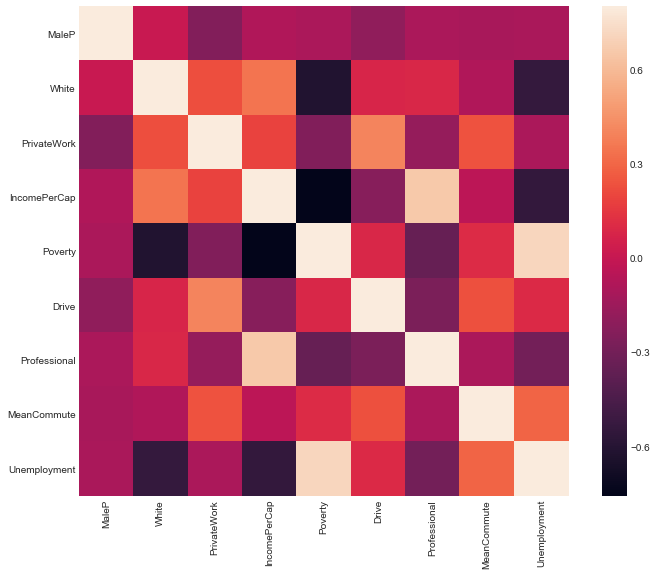

                Professional  IncomePerCap     White  Prof_ICP_White
Professional        1.000000      0.655480  0.085386        0.765456
IncomePerCap        0.655480      1.000000  0.345323        0.879750
White               0.085386      0.345323  1.000000        0.629080
Prof_ICP_White      0.765456      0.879750  0.629080        1.000000


In [69]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


#I don't have 3 redundant features, but Professional, IncomePerCapita and White correlate as well as any three so I'll
#make a feature of of their composite.


#Scale the Data and make feature 5
means = df[['Professional','IncomePerCap','White']].mean(axis=0)
stds = df[['Professional','IncomePerCap','White']].std(axis=0)
features['Prof_ICP_White'] = ((df[['Professional','IncomePerCap','White']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['Professional','IncomePerCap','White']]
plotdf['Prof_ICP_White'] = features['Prof_ICP_White'] 
corrmat2 = plotdf.corr()

print(corrmat2)

## Seeking non-normality

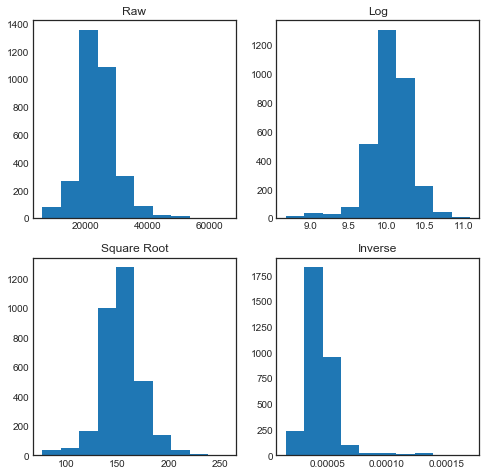

In [70]:
# Making a four-panel plot.
fig = plt.figure(figsize = (8,8))

fig.add_subplot(221)
plt.hist(df['IncomePerCap'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['IncomePerCap'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['IncomePerCap'].dropna()))
plt.title('Square Root')

ax3=fig.add_subplot(224)
plt.hist(1/df['IncomePerCap'].dropna(),)
plt.title('Inverse')
plt.show()

# None look great, but I'll keep the Square Root one as a 
#feature 6 to have a non-normal feature to compare to my outcome.

features['sqrt_IPC'] = np.log(df['IncomePerCap'])

## Creating Linear Relationships

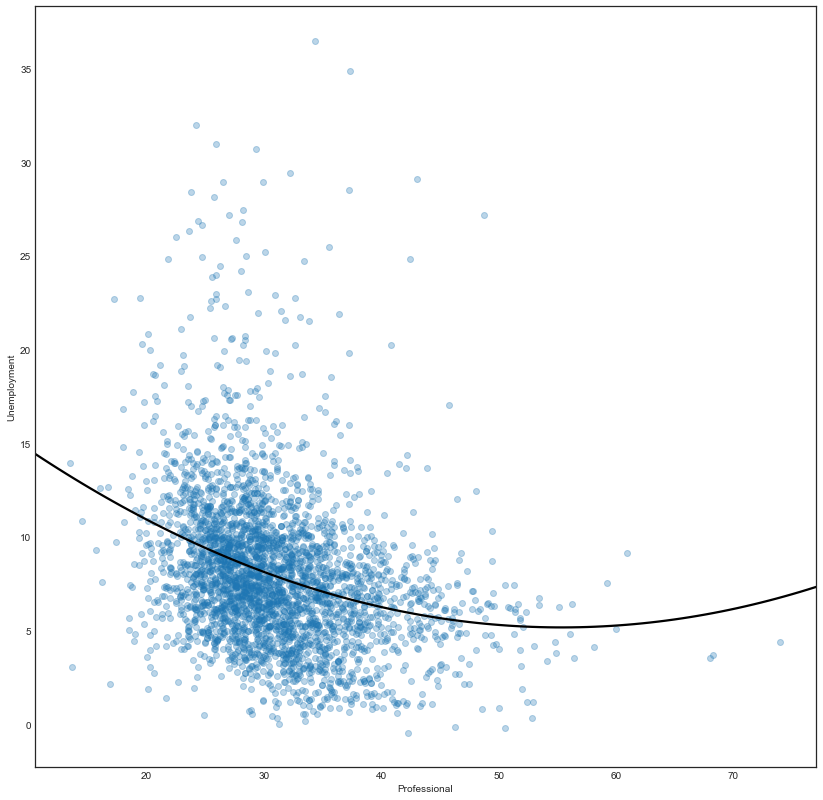

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 14)
sns.regplot(
    df['Professional'],
    y=df['Unemployment'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


#feature 7
features['professionalSquared'] = df['Professional'] * df['Professional']

## Reverse-coding

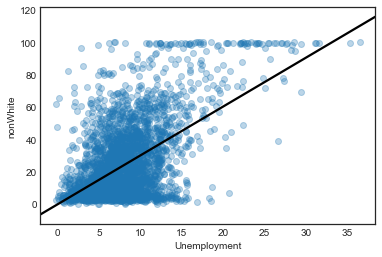

In [72]:
# Feature 8: Reverse coding the White column to NonWhite. This is different than above where I created a Diversity category.
features['nonWhite'] = max(df['White']) - df['White']

sns.regplot(
    df['Unemployment'],
    features['nonWhite'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Unemployment')
plt.ylabel('nonWhite')
plt.show()




## Interactions

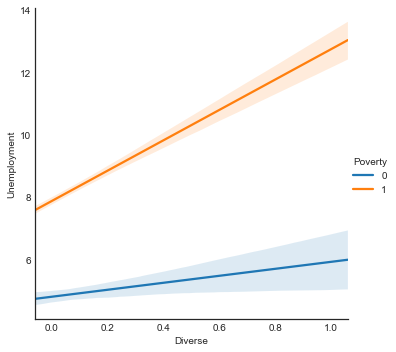

In [73]:
# I already have two features I coded for above, so I'll use those here and keep exploring Race and Gender
features['Poverty'] = np.where(df['Poverty'] >10, 1, 0)

# Create the interaction.(Feature 9: What is the relationship between poverty/diversity and unemployment)
features['DiverseWithPoverty'] = features['Diverse'] * features['Poverty']

# A plot of an interaction.
features['Unemployment'] = df['Unemployment']
sns.lmplot(
    x='Diverse',
    y='Unemployment',
    hue='Poverty',
    data=features,
    scatter=False
)
plt.show()

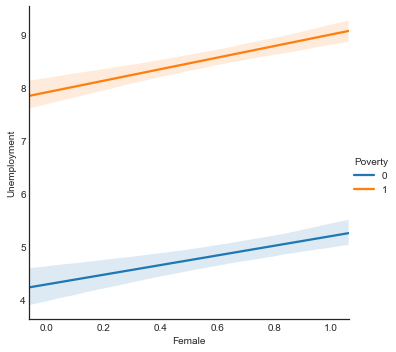

In [74]:
# I already have two features I coded for above, so I'll use those here and keep exploring Race and Gender
features['Female'] = np.where(df['MaleP'] <.50, 1, 0)

# Create the interaction.(Feature 10: What is the relationship between women/poverty and unemployment)
features['FemaleWithPoverty'] = features['Female'] * features['Poverty']

# A plot of an interaction.
sns.lmplot(
    x='Female',
    y='Unemployment',
    hue='Poverty',
    data=features,
    scatter=False
)
plt.show()

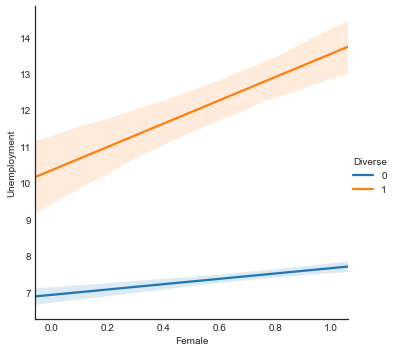

In [96]:
# Create the interaction.(Feature 11: What is the relationship between women/diversity and unemployment)
features['FemaleWithDiversity'] = features['Female'] * features['Diverse']

# A plot of an interaction.
sns.lmplot(
    x='Female',
    y='Unemployment',
    hue='Diverse',
    data=features,
    scatter=False
)
plt.show()

## Feature Selection

In [97]:
#Filtering out the states so it's easier to plot
featuresShort = features.filter(items=['FemaleWithPoverty','DiverseWithPoverty','FemaleWithDiversity','nonWhite','professionalSquared',
                       'sqrt_IPC','Prof_ICP_White','MostlyMen','Diverse','MidWest','Venture','Unemployment'])



                     FemaleWithPoverty  DiverseWithPoverty  \
FemaleWithPoverty             1.000000            0.787833   
DiverseWithPoverty            0.787833            1.000000   
FemaleWithDiversity           1.000000            0.787833   
nonWhite                      0.678164            0.791715   
professionalSquared          -0.018725           -0.106974   
sqrt_IPC                     -0.362788           -0.417128   
Prof_ICP_White               -0.426988           -0.548852   
MostlyMen                    -0.238716           -0.028788   
Diverse                       0.800182            0.980204   
MidWest                      -0.149773           -0.187433   
Venture                       0.029704            0.016532   
Unemployment                  0.424290            0.442485   

                     FemaleWithDiversity  nonWhite  professionalSquared  \
FemaleWithPoverty               1.000000  0.678164            -0.018725   
DiverseWithPoverty              0.787833  0

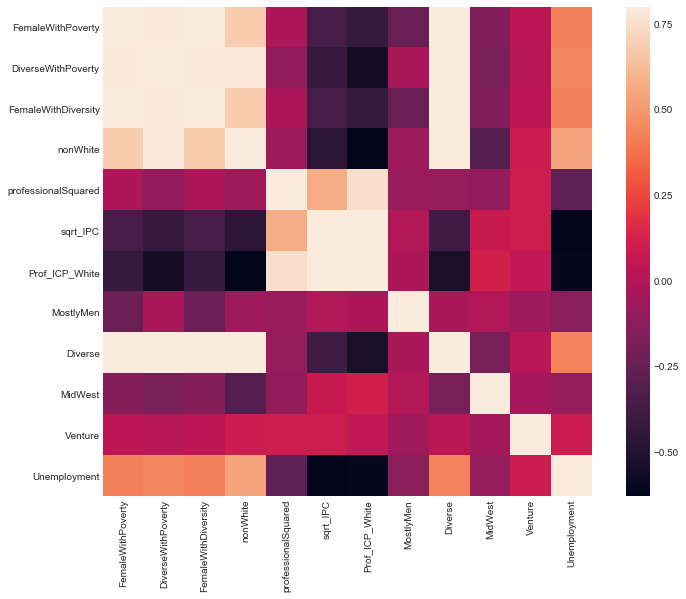

In [98]:
# Make the correlation matrix.
corrmat = featuresShort.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

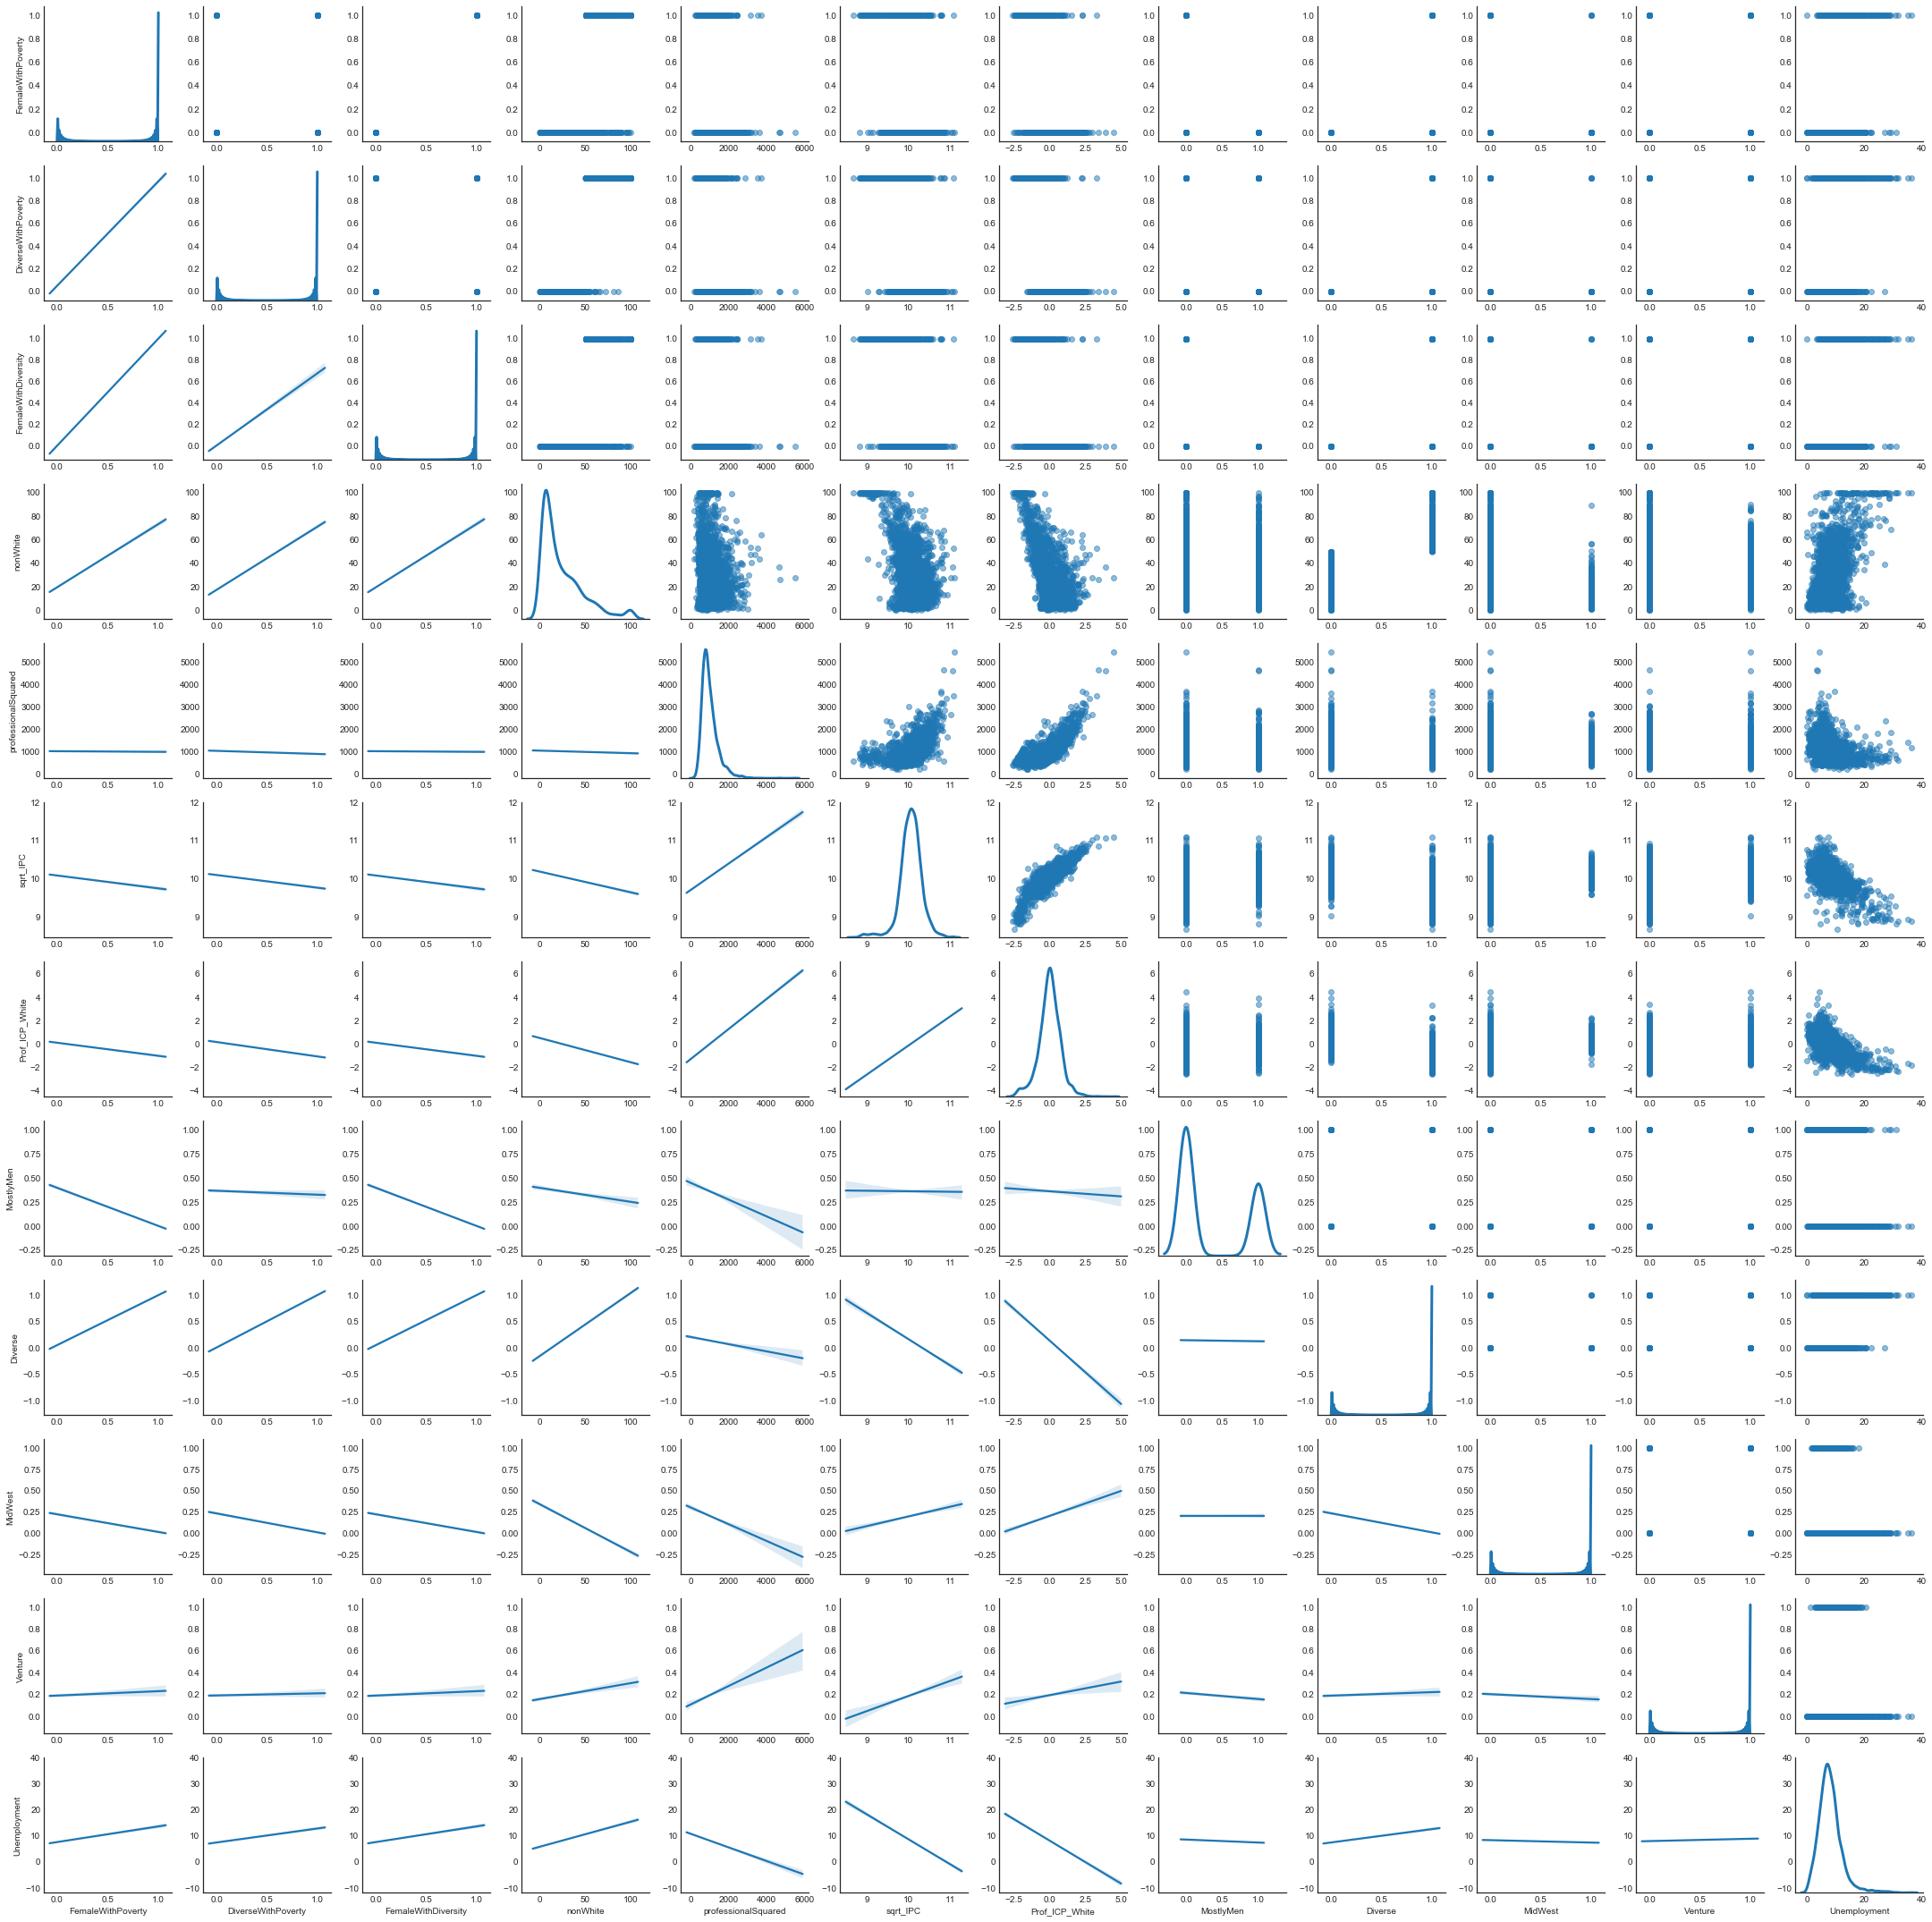

In [99]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(featuresShort.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [100]:
print(featuresShort.describe())

for col in featuresShort.loc[:, "FemaleWithPoverty":"Unemployment"].columns:
    print(col)
    print(np.var(featuresShort[col]))

       FemaleWithPoverty  DiverseWithPoverty  FemaleWithDiversity  \
count        3220.000000         3220.000000          3220.000000   
mean            0.092236            0.132298             0.092236   
std             0.289404            0.338867             0.289404   
min             0.000000            0.000000             0.000000   
25%             0.000000            0.000000             0.000000   
50%             0.000000            0.000000             0.000000   
75%             0.000000            0.000000             0.000000   
max             1.000000            1.000000             1.000000   

          nonWhite  professionalSquared     sqrt_IPC  Prof_ICP_White  \
count  3220.000000          3220.000000  3220.000000    3.220000e+03   
mean     24.371211          1000.962248    10.050908   -6.184287e-15   
std      22.932890           443.447597     0.268826    7.580954e-01   
min       0.000000           182.250000     8.678972   -2.577432e+00   
25%       6.600000

The outcome I'm studying is Unemployment.

My filter method is mostly correlation with the outcome and other variables. I'm throwing out ProfessionalSquared due to it's high variance. 

My 5 features.

Prof_IPC_White becuase it combines three likely predictors/associations and has a strong negative correlation to Poverty.

DiversityWithPoverty: Of the Interaction features, this one has a wider range of correlations with other variables.

Nonwhite: Strong correlation to Unemployment and it's a continous variable instead of a categorical.

Sqrt_IPC: Strong correlation with Unemployment and low variance

Diverse: Top 5 in correlations with Unemployment and it pairs nicely with DiverseityWithPoverty.

